In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt

In [2]:
class Batch:
  quality = 0.5
  alpha = 1
  beta = 1
  good = 0
  
  def __init__(self, quality):
    self.quality = quality
  
  def sample_distribution(self):
    return np.random.beta(self.alpha, self.beta)
  
  def get_element(self):
    good = np.random.rand() < self.quality
    self.alpha = self.alpha + int(good)
    self.beta = self.beta + 1 - int(good)
    return good

In [3]:
class Bayesian_Factory:
  batches = []
  systems = 0
  good = 0
  
  def set_batches(self, qualities):
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
  
  def get_element(self):
    samples = [batch.sample_distribution() for batch in self.batches]
    choice = np.argmax(samples)
    result = self.batches[choice].get_element()
    self.systems = self.systems + 1
    self.good = self.good + int(result)

In [4]:
class Forgetting_Bayesian_Factory:
  batches = []
  systems = 0
  good = 0
  
  def set_batches(self, qualities):
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
  
  def get_element(self):
    samples = [batch.sample_distribution() for batch in self.batches]
    choice = np.argmax(samples)
    result = self.batches[choice].get_element()
    self.systems = self.systems + 1
    self.good = self.good + int(result)

    # forgetting
    for b in self.batches:
        b.alpha = round(b.alpha * 0.95)
        b.beta =  round(b.beta * 0.95)

In [5]:
class swap_on_bad_Factory:
  batches = []
  systems = 0
  good = 0
  current_batch = 0

  def set_batches(self, qualities):
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
  
  def get_element(self):
    print
    if self.batches[self.current_batch].get_element():
        self.systems += 1
        self.good += 1
    else:
        self.systems += 1
        if self.current_batch < len(batches)-1:
            self.current_batch += 1
        else:
            self.current_batch = 0



In [6]:
class rank_n_Factory:
  batches = []
  systems = 0
  good = 0
  current_batch = 0
  epoch = 0
  training = 0
  in_training = True
  order =[]


  def set_batches(self, qualities, training):
    #training -> how many systems are preoduced for each manufacturer
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
    self.training = len(batches)*training
    self.order = []

  def get_element(self):
    if self.in_training:  
        self.epoch +=1

        self.systems += 1
        if self.batches[self.current_batch].get_element():
            self.good += 1
            self.batches[self.current_batch].good += 1
            
        if self.current_batch < len(batches)-1:
            self.current_batch += 1
        else:
            self.current_batch = 0

        if self.epoch >= self.training:
            self.in_training = False
            self.epoch = 0
            order = []
            scores = [x.good for x in self.batches] 
            for i in range(len(scores)):
                for a in range(len(batches)-i):
                    self.order.append(np.argmax(scores))
                scores[np.argmax(scores)] = -1
    # after training
    else:
        if self.epoch > len(self.order)-1:
            self.epoch = 0
        
        self.systems += 1
        if self.batches[self.order[self.epoch]].get_element():
            self.good += 1
        
        self.epoch += 1

In [7]:
class rank_s_Factory:
  batches = []
  systems = 0
  good = 0
  current_batch = 0
  epoch = 0
  training = 0
  in_training = True
  order =[]


  def set_batches(self, qualities, training):
    #training -> how many systems are preoduced for each manufacturer
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
    self.training = len(batches)*training
    self.order = []

  def get_element(self):
    if self.in_training:  
        self.epoch +=1

        self.systems += 1
        if self.batches[self.current_batch].get_element():
            self.good += 1
            self.batches[self.current_batch].good += 1
            
        if self.current_batch < len(batches)-1:
            self.current_batch += 1
        else:
            self.current_batch = 0

        if self.epoch >= self.training:
            self.in_training = False
            self.epoch = 0
            scores = [x.good for x in self.batches]
            scores2 = scores.copy()

            last_count = 1
            for i in range(len(scores)):
                if i == 0:
                    self.order.append(np.argmin(scores))
                    scores[np.argmin(scores)] = 1_000_000
                else:
                    si_minus_1 = scores2[self.order[-1]]
                    si = scores2[i]
                    if si_minus_1 == 0:
                        si_minus_1 = 1
                    last_count *= round(si/si_minus_1)
                    for a in range(last_count):
                        self.order.append(np.argmin(scores))
                    scores[np.argmin(scores)] = 1_000_000
            self.order.reverse()
    # after training
    else:
        if self.epoch > len(self.order)-1:
            self.epoch = 0
        
        self.systems += 1
        if self.batches[self.order[self.epoch]].get_element():
            self.good += 1
        
        self.epoch += 1

In [8]:
class my_Factory:
# choosing the best manufacturer after learning,
# when the best manfacturer gives bad component I'm randomly choosing the next manufacturer
#  with probabilities based on their learning phase scores 
  batches = []
  systems = 0
  good = 0
  current_batch = 0
  epoch = 0
  training = 0
  in_training = True
  order =[]


  def set_batches(self, qualities, training):
    #training -> how many systems are preoduced for each manufacturer
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
    self.training = len(batches)*training
    self.order = []

  def get_element(self):
    if self.in_training:  
        self.epoch +=1

        self.systems += 1
        if self.batches[self.current_batch].get_element():
            self.good += 1
            self.batches[self.current_batch].good += 1
            
        if self.current_batch < len(batches)-1:
            self.current_batch += 1
        else:
            self.current_batch = 0

        if self.epoch >= self.training:
          self.in_training = False
          self.epoch = 0
          order = []
          scores = [x.good for x in self.batches] 
          for i in range(len(scores)):
              for a in range(len(batches)-i):
                  self.order.append(np.argmax(scores))
              scores[np.argmax(scores)] = -1
          self.current_batch = self.order[0]

    # after training
    else:
      self.systems+=1
      if self.batches[self.current_batch].get_element():
        self.good += 1
      else:
        self.current_batch = random.choice(self.order)


In [19]:
tries = 100 # for averaging scores of each strategy
epoch = 300 # how many systems are produced
learning = 30
batches = [0.98, 0.75, 0.85, 0.8, 0.6]
# batches = [0.2, 0.4, 0.6, 0.8, 0.9]

swapFactoryScore = 0
rankNFactoryScore = 0
rankSFactoryScore = 0
BayesianFactoryScore = 0
myFactoryScore = 0
fbFactoryScore = 0

for _ in range(tries): 
  swapFactory = swap_on_bad_Factory()
  swapFactory.set_batches(batches)
  for i in range(epoch):
    swapFactory.get_element()
  swapFactoryScore += swapFactory.good/swapFactory.systems

  rankNFactory = rank_n_Factory()
  rankNFactory.set_batches(batches, learning)
  for i in range(epoch):
    rankNFactory.get_element()
  rankNFactoryScore += rankNFactory.good/rankNFactory.systems

  rankSFactory = rank_s_Factory()
  rankSFactory.set_batches(batches, learning)
  for i in range(epoch):
    rankSFactory.get_element()
  rankSFactoryScore += rankSFactory.good/rankSFactory.systems

  BayesianFactory = Bayesian_Factory()
  BayesianFactory.set_batches(batches)
  for i in range(epoch):
    BayesianFactory.get_element()
  BayesianFactoryScore += BayesianFactory.good/BayesianFactory.systems

  myFactory = my_Factory()
  myFactory.set_batches(batches, learning)
  for i in range(epoch):
    myFactory.get_element()
  myFactoryScore += myFactory.good/myFactory.systems

  fbFactory = Forgetting_Bayesian_Factory()
  fbFactory.set_batches(batches)
  for i in range(epoch):
    fbFactory.get_element()
  fbFactoryScore += fbFactory.good/fbFactory.systems


print(f'Average succes ratio for swap on bad strategy: {swapFactoryScore/tries:.2%}')
print(f'Average succes ratio for rank n strategy: {rankNFactoryScore/tries:.2%}')
print(f'Average succes ratio for rank s strategy: {rankSFactoryScore/tries:.2%}')
print(f'Average succes ratio for Bayesian strategy: {BayesianFactoryScore/tries:.2%}')
print(f'Average succes ratio for my strategy: {myFactoryScore/tries:.2%}')
print(f'Average succes ratio for forgetting Bayesian strategy: {fbFactoryScore/tries:.2%}')

Average succes ratio for swap on bad strategy: 92.65%
Average succes ratio for rank n strategy: 82.22%
Average succes ratio for rank s strategy: 79.69%
Average succes ratio for Bayesian strategy: 95.19%
Average succes ratio for my strategy: 87.77%
Average succes ratio for forgetting Bayesian strategy: 89.70%


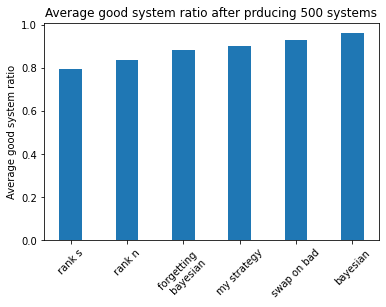

In [16]:
data = {'swap on bad':swapFactoryScore/tries,
        'rank n':rankNFactoryScore/tries,
        'rank s':rankSFactoryScore/tries,
        'bayesian':BayesianFactoryScore/tries,
        'forgetting \n bayesian':fbFactoryScore/tries,
        'my strategy': myFactoryScore/tries}

data = dict(sorted(data.items(), key=lambda item: item[1]))

names = list(data.keys())
values = list(data.values())

plt.bar(names, values, width = 0.4)

plt.ylabel("Average good system ratio")
plt.title(f"Average good system ratio after prducing {epoch} systems")
plt.xticks(rotation=45)
plt.show()

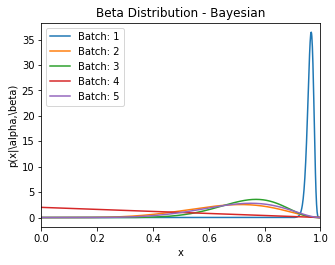

In [21]:
alphas = []
betas = []
for b in BayesianFactory.batches:
  alphas.append(b.alpha)
  betas.append(b.beta)

x = np.linspace(0, 1, 1002)[1:-1]

fig, ax = plt.subplots(figsize=(5, 3.75))

no = 0
for a, b in zip(alphas, betas):
  dist = beta(a, b)
  no+=1
  plt.plot(x, dist.pdf(x), label=f'Batch: {no}')


plt.xlim(0, 1)


plt.xlabel('x')
plt.ylabel(r'p(x|\alpha,\beta)')
plt.title('Beta Distribution - Bayesian')
plt.legend(loc=0)
plt.show()

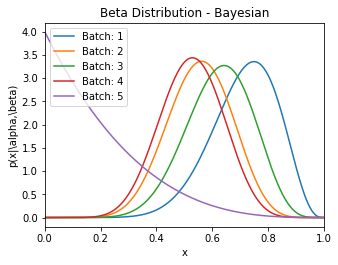

In [20]:
alphas = []
betas = []
for b in fbFactory.batches:
  alphas.append(b.alpha)
  betas.append(b.beta)

x = np.linspace(0, 1, 1002)[1:-1]

fig, ax = plt.subplots(figsize=(5, 3.75))

no = 0
for a, b in zip(alphas, betas):
  dist = beta(a, b)
  no+=1
  plt.plot(x, dist.pdf(x), label=f'Batch: {no}')


plt.xlim(0, 1)


plt.xlabel('x')
plt.ylabel(r'p(x|\alpha,\beta)')
plt.title('Beta Distribution - Bayesian')
plt.legend(loc=0)
plt.show()

własna srategia:
po porcesie uczenia wybieram najlepszego producenta, gdy ten dostarczy wadliwy produkt zmieniam go na losowego producenta. producentów losuje z rozkładu zgodnego z ich wynikami. dla 5 producentów najlepszy będzie miał szanse 5/15 a najgorszy 1/15

strategia bayesa która zapomina z czasem parametrów daje duże szanse gorszym producentom. rozkład jednostajny jest dla nich bardziej korzystny niź dla producenta najlepszego